In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

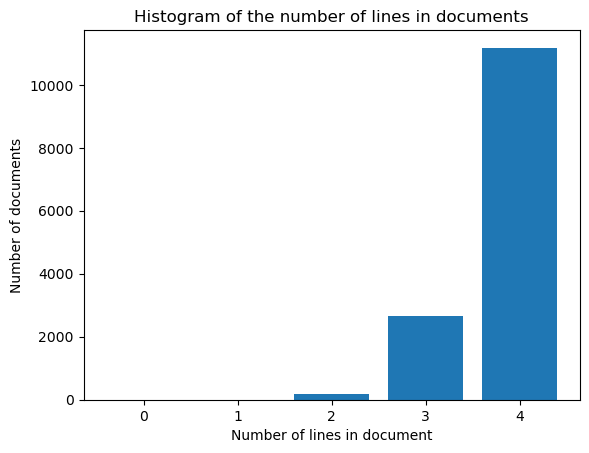

In [11]:
folder_path_train = './data/train/labels'

line_counts_train = []

for filename in os.listdir(folder_path_train):
    file_path = os.path.join(folder_path_train, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            lines = file.readlines()
            line_count = len(lines)
            line_counts_train.append(line_count)

count_per_line_train = np.bincount(line_counts_train)

plt.bar(range(len(count_per_line_train)), count_per_line_train)
plt.xlabel('Number of lines in document')
plt.ylabel('Number of documents')
plt.title('Histogram of the number of lines in documents')
plt.show()

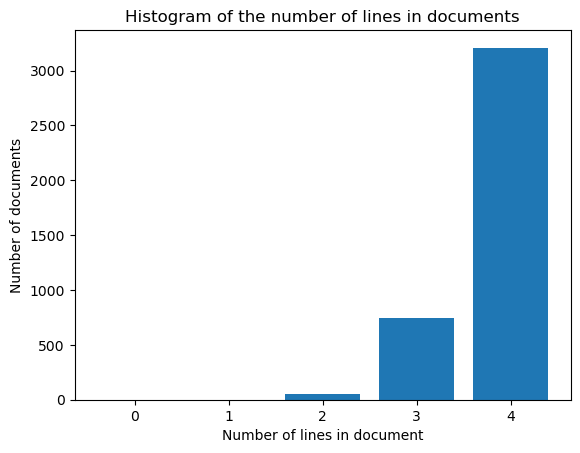

In [12]:
folder_path_valid = './data/valid/labels'

line_counts_valid = []

for filename in os.listdir(folder_path_valid):
    file_path = os.path.join(folder_path_valid, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            lines = file.readlines()
            line_count = len(lines)
            line_counts_valid.append(line_count)

count_per_line_valid = np.bincount(line_counts_valid)

plt.bar(range(len(count_per_line_valid)), count_per_line_valid)
plt.xlabel('Number of lines in document')
plt.ylabel('Number of documents')
plt.title('Histogram of the number of lines in documents')
plt.show()

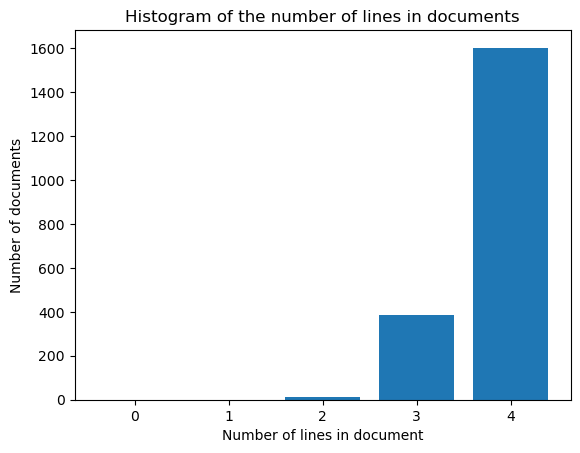

In [13]:
folder_path_test = './data/test/labels'

line_counts_test = []

for filename in os.listdir(folder_path_test):
    file_path = os.path.join(folder_path_test, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            lines = file.readlines()
            line_count = len(lines)
            line_counts_test.append(line_count)

count_per_line_test = np.bincount(line_counts_test)

plt.bar(range(len(count_per_line_test)), count_per_line_test)
plt.xlabel('Number of lines in document')
plt.ylabel('Number of documents')
plt.title('Histogram of the number of lines in documents')
plt.show()

In [14]:
count_per_line_train, count_per_line_valid, count_per_line_test

(array([    0,     0,   175,  2647, 11178], dtype=int64),
 array([   0,    0,   50,  741, 3209], dtype=int64),
 array([   0,    0,   14,  384, 1602], dtype=int64))

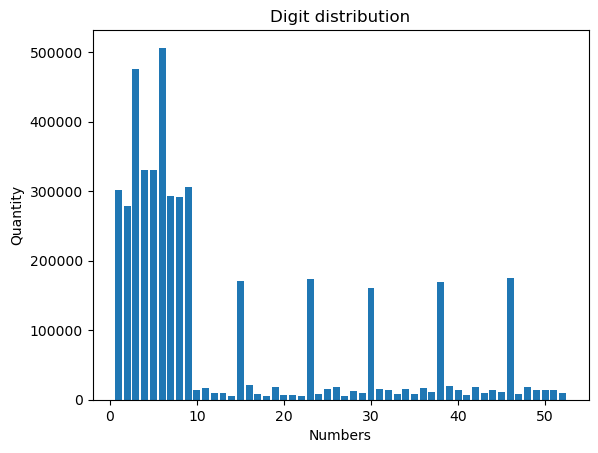

In [15]:
folder_path = './data/train/labels'

counts = {i: 0 for i in range(1, 53)}

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            for i in range(1, 53):
                counts[i] += content.count(str(i))

labels = np.arange(1, 53)
counts = np.array(list(counts.values()))

fig, ax = plt.subplots()
ax.bar(labels, counts)

ax.set_xlabel('Numbers')
ax.set_ylabel('Quantity')
ax.set_title('Digit distribution')

plt.show()

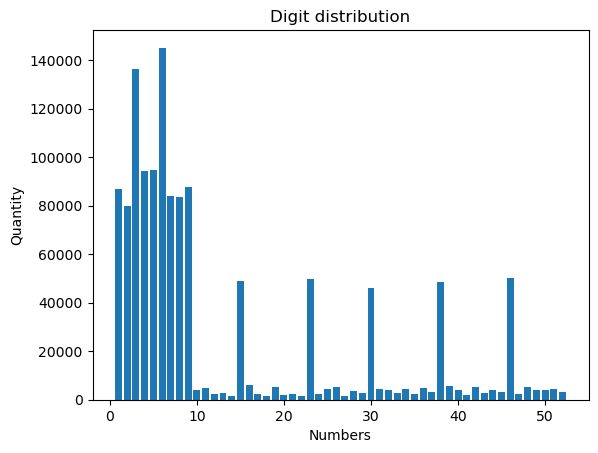

In [16]:
folder_path = './data/valid/labels'

counts = {i: 0 for i in range(1, 53)}

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            for i in range(1, 53):
                counts[i] += content.count(str(i))

labels = np.arange(1, 53)
counts = np.array(list(counts.values()))

fig, ax = plt.subplots()
ax.bar(labels, counts)

ax.set_xlabel('Numbers')
ax.set_ylabel('Quantity')
ax.set_title('Digit distribution')

plt.show()

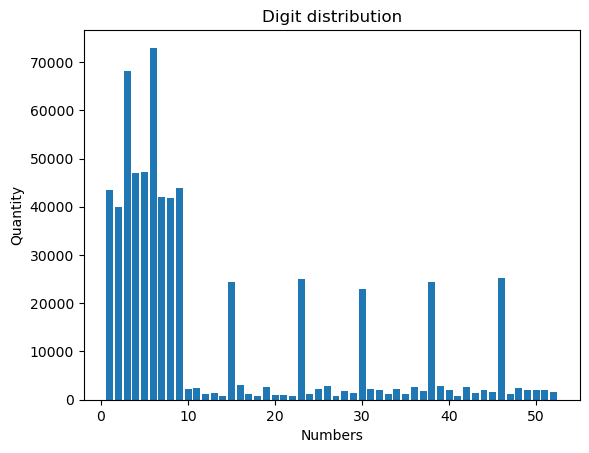

In [17]:
folder_path = './data/test/labels'

counts = {i: 0 for i in range(1, 53)}

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            for i in range(1, 53):
                counts[i] += content.count(str(i))

labels = np.arange(1, 53)
counts = np.array(list(counts.values()))

fig, ax = plt.subplots()
ax.bar(labels, counts)

ax.set_xlabel('Numbers')
ax.set_ylabel('Quantity')
ax.set_title('Digit distribution')

plt.show()

In [ ]:
image_folder = r"D:\projects\playing_cards_object_detection\data\train\images"
label_folder = r"D:\projects\playing_cards_object_detection\data\train\labels"
image_name = "000233645_jpg.rf.843259f9e28b9e485f219f8bfa2c5cdf.jpg"

image_path = os.path.join(image_folder, image_name)

label_name = image_name.replace(".jpg", ".txt")
label_path = os.path.join(label_folder, label_name)

image = cv2.imread(image_path)

with open(label_path, "r") as file:
    lines = file.readlines()

for line in lines:
    values = line.strip().split(" ")
    
    class_id = int(values[0])
    center_x = float(values[1])
    center_y = float(values[2])
    width = float(values[3])
    height = float(values[4])
    
    x = int((center_x - width/2) * image.shape[1])
    y = int((center_y - height/2) * image.shape[0])
    x2 = int((center_x + width/2) * image.shape[1])
    y2 = int((center_y + height/2) * image.shape[0])
    
    cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
    
    cv2.putText(image, f"Class: {class_id}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2.imshow("Image with Boxes", image)
cv2.waitKey(0)